# Dependencies

In [1]:
pacman::p_load(dplyr, openxlsx)

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

In [4]:
ffpe <- read.xlsx(paste0(datapath, "CHOP Lab Processing Log.xlsx"), sheet = 3)

In [5]:
metadata <- read.csv(file = paste0(datapath, "INT_metadata_flow.csv"),header = T, stringsAsFactors = F)

# PBMC

In [6]:
pbmc <- read.xlsx(paste0(datapath, "CHOP Lab Processing Log.xlsx"), sheet = 2)

In [7]:
pbmc$Specimen.ID <- trimws(pbmc$Specimen.ID)

In [8]:
pbmc$Colour.Legend <- NULL

In [9]:
missingsamples <- pbmc[ which(pbmc$Missing.Samples == "***Potentially missing! Not found in specified location"),]

In [10]:
missingsamples <- rbind(missingsamples, 
                       pbmc[ which(pbmc$Notes == "Sample 423-02 is missing, this location is sample 413-02"),])

In [11]:
missingsamples

,Shipment.#,Batch,Original.Box#,Original.Box.Location,Specimen.ID,Date.Frozen,Study.Cohort,Sample.Type,Date.transferred.to.Pugh.Lab,Total.Cell.Number,...,Final.Capture.Vol.(uL),Total.Capture.Library.Yield.(ng),Miseq.for.Capture,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.ID,Vol.used.for.sequencing.(uL),Vol.Remaining.(uL),Capture.Notes
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
456,1,NA,NOT SENT,NA,331-03,NA,NA,NA,NA,3300000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
457,1,NA,NOT SENT,NA,338-01,NA,NA,NA,NA,600000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
458,2,NA,Cell Box 2,I5,423-02,NA,NA,Cell,NA,1530000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
#remove missing samples
pbmc <- pbmc[ is.na(pbmc$Missing.Samples),]
pbmc <- pbmc[! pbmc$Notes %in% "Sample 423-02 is missing, this location is sample 413-02",]

In [13]:
dim(pbmc)

[1] 455  60

In [14]:
#remove empty entry
pbmc <- pbmc[!is.na(pbmc$Specimen.ID), ]

In [15]:
 length(pbmc$Specimen.ID)

[1] 454

In [16]:
summary(as.numeric(pbmc$Total.Cell.Number))

Warning message in summary(as.numeric(pbmc$Total.Cell.Number)):
"NAs introduced by coercion"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     9000   1030000   2000000   4457362   3825000 117000000        70 

In [17]:
pbmc$Total.Cell.Number1 <- as.numeric(pbmc$Total.Cell.Number)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [18]:
head(pbmc$`Amount.of.DNA.used.for.Library.Prep.(ng)`)

[1] 600 600 600 600 600 600

Find correlation between cell number and ng DNA

In [19]:
tmp <- pbmc[ which(pbmc$`Amount.of.DNA.used.for.Library.Prep.(ng)` == 600),]

In [20]:
summary(tmp$Total.Cell.Number1)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
   170000   1562500   2700000   6343817   5675000 117000000         2 

In [21]:
summary(tmp$`DNA.total.(ng)`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    665    2480    4760    8889    9425   81200 

`geom_smooth()` using formula = 'y ~ x'


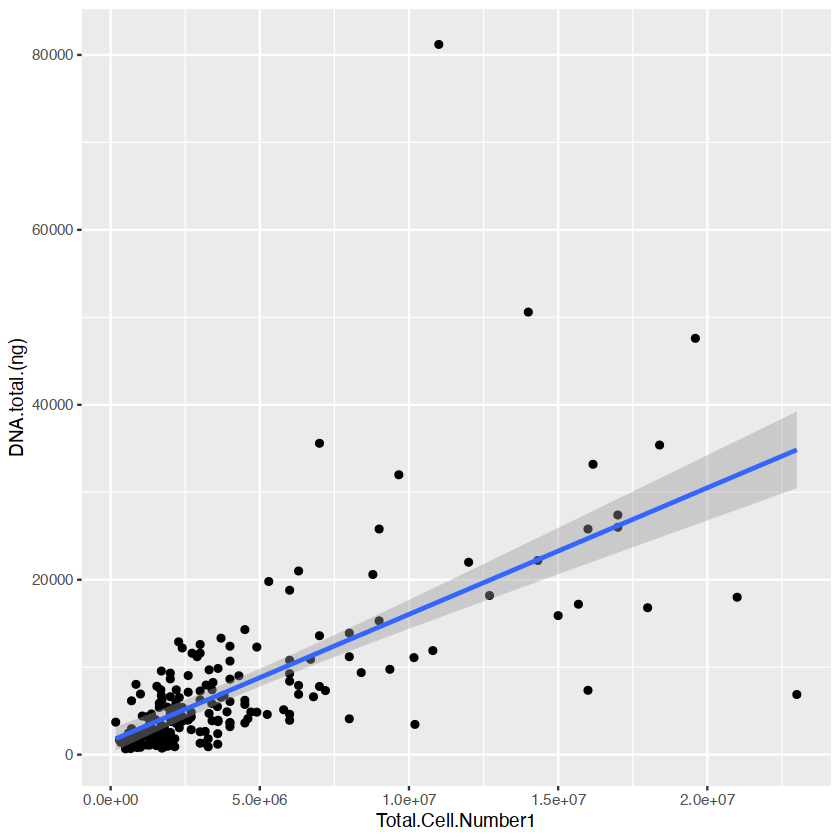

In [22]:
ggplot(data = tmp[ which(tmp$Total.Cell.Number1 < 30000000),], aes( y= `DNA.total.(ng)`, x = Total.Cell.Number1)) + geom_point() + geom_smooth( method = "lm")

In [23]:
lm(`DNA.total.(ng)` ~ Total.Cell.Number1, data = tmp[ which(tmp$Total.Cell.Number1 < 30000000),])


Call:
lm(formula = `DNA.total.(ng)` ~ Total.Cell.Number1, data = tmp[which(tmp$Total.Cell.Number1 < 
    3e+07), ])

Coefficients:
       (Intercept)  Total.Cell.Number1  
         1.577e+03           1.447e-03  


In [71]:
head(pbmc[ order(pbmc$Total.Cell.Number1, decreasing = F), ])

,Shipment.#,Batch,Original.Box#,Original.Box.Location,Specimen.ID,Date.Frozen,Study.Cohort,Sample.Type,Date.transferred.to.Pugh.Lab,Total.Cell.Number,...,Total.Capture.Library.Yield.(ng),Miseq.for.Capture,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.ID,Vol.used.for.sequencing.(uL),Vol.Remaining.(uL),Capture.Notes,Total.Cell.Number1
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
383,2,14,Cell Box 2,G6,406-03,43620,NA,Cell,NA,9000,...,19.95,Passed,200612_M04827_0392_000000000-D879T,Yes,44314,BCX_tumour_CHP_PBMC_Remaining_Batches_PostCap_capTCRseq_NextSeq_Pool3,17.26,1.74,NA,9000
385,2,NA,Cell Box 2,E2,403-03,43585,NA,NA,NA,87000,...,0.00,NA,NA,NA,NA,NA,NA,NA,NA,87000
181,1,7,2,E6,375-02,43319,NA,Cell,NA,170000,...,235.60,Passed,191002_M04827_0273_000000000-D5FJK,Yes,43746,CHP Post-Cap TCR Libraries (24 samples) Nextseq Library Pool Batch 7,2.11,16.89,NA,170000
382,2,14,Cell Box 2,F7,414-01,43595,NA,Cell,NA,190000,...,19.95,Passed,200612_M04827_0392_000000000-D879T,Yes,44314,BCX_tumour_CHP_PBMC_Remaining_Batches_PostCap_capTCRseq_NextSeq_Pool3,17.26,1.74,NA,190000
283,2,10,Cell Box 2,D4,406-02,43573,NA,Cell,NA,200000,...,0.00,NA,NA,NA,NA,NA,NA,NA,NA,200000
413,2,NA,NA,NA,402-01,43507,NA,Cell,NA,200000,...,0.00,NA,NA,NA,NA,NA,NA,NA,NA,200000


# cfDNA

In [24]:
cfdna <- read.xlsx(paste0(datapath, "CHOP Lab Processing Log_AN.xlsx"), sheet = 1)

In [25]:
cfdna$Sample.ID <- trimws(cfdna$Sample.ID)

In [26]:
length(cfdna$Sample.ID)

[1] 355

In [27]:
cfdna$Colour.Legend <- NULL

In [28]:
cfdna <- cfdna[ which(cfdna$`Batch.#` != "rm"),]

In [29]:
dim(cfdna)

[1] 316  55

In [32]:
# get total number of samples shipped
cfdna_samples <- data.frame(cfdna$Sample.ID, stringsAsFactors = F)

In [33]:
cfdna$samplevol <- as.numeric(cfdna$`Original.Plasma.Volume.(ml)`)
cfdna$yield <- as.numeric(cfdna$`Total.yield.Elution.1`)

In [34]:
head(cfdna)

,Shipment.#,Batch.#,Sample.ID,Original.Box.#,Original.Box.Location,Sample.Type,Original.Plasma.Volume.(ml),Extraction.Date,Extraction.Operator,Concentration.Elution.1.(ng/ul),...,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.Submission.ID,Vol.used.for.Seq.(uL),Vol.Remaining.(uL),Capture.Notes,X56,samplevol,yield
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2,1,1,346-01,1,E1,Plasma,4.5,43523,JW,0.65200000000000002,...,NA,NA,NA,NA,NA,NA,NA,NA,4.5,19.5600
4,1,1a,348-01,1,G5,Plasma,4.5,43511,RP/JW,0.48,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA,4.5,14.4000
6,1,1a,348-03,3,H2,Plasma,3.0,43511,RP/JW,0.75600000000000001,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA,3.0,24.4944
7,1,1a,343-04,2,H5,Plasma,4.5,43504,RP/JW,0.56000000000000005,...,200909_M04827_0434_000000000-D9988,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,3.26,15.74,NA,NA,4.5,56.0000
9,1,1a,329-04,2,I2,Plasma,3.0,43511,RP/JW,0.99199999999999999,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,2.67,16.33,NA,NA,3.0,40.0768
10,1,1a,331-05,3,D6,Plasma,6.0,43516,RP/JW,0.89200000000000002,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,4.84,14.16,NA,NA,6.0,71.3600


In [35]:
summary(cfdna$samplevol[ cfdna$yield >= 20])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.191   0.900   3.000   2.846   4.500   9.000 

In [36]:
summary(cfdna$yield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.40   18.88   35.04  203.51  100.80 9120.00 

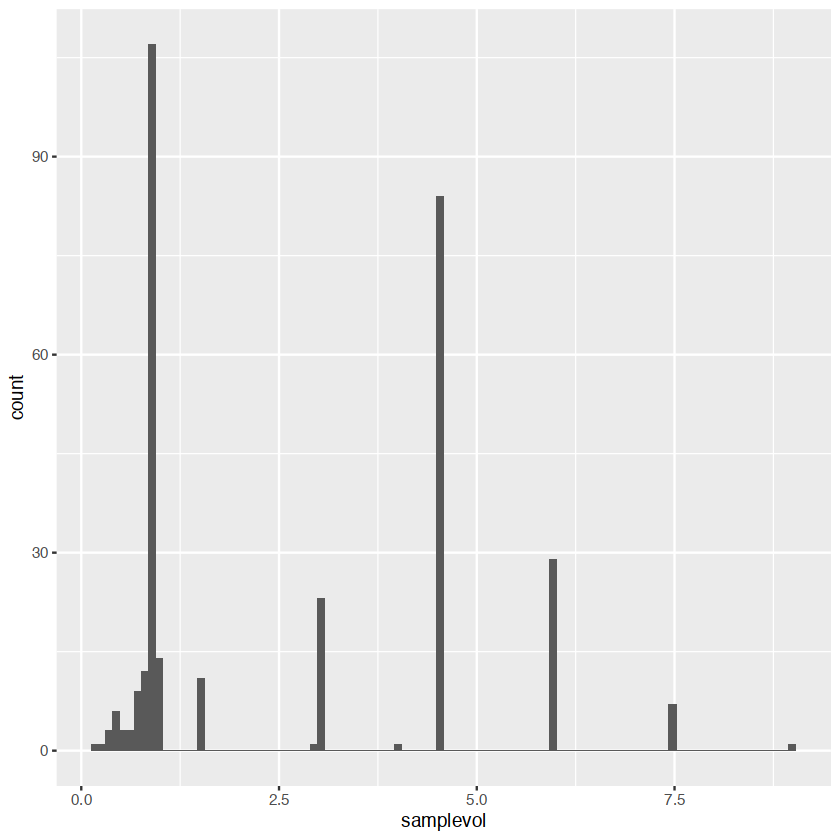

In [37]:
ggplot(data = cfdna, aes(x= samplevol)) + geom_histogram(bins = 100)

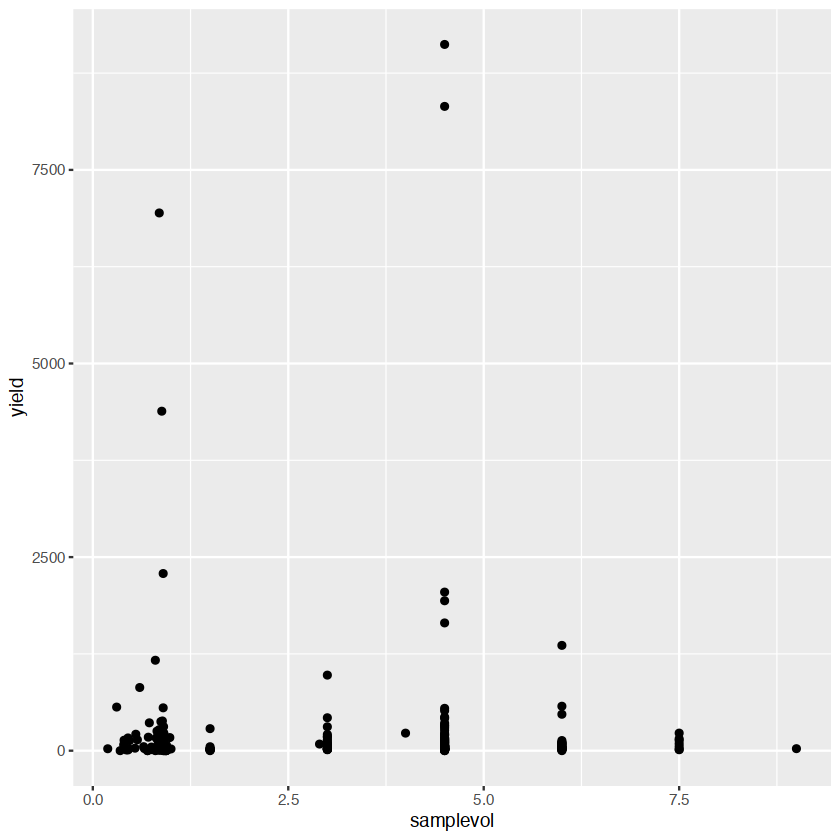

In [38]:
ggplot(data = cfdna, aes( y= yield, x = samplevol)) + geom_point() 
# geom_smooth( method = "lm")+
# geom_hline( yintercept = 20, linetype = "dashed") + 
 #+ geom_smooth( method = "lm")

In [39]:
cfdna$Patient <- gsub("-.*","", cfdna$Sample.ID )

In [40]:
cfdna$Patient <- paste0("CHP_", cfdna$Patient)

In [41]:
nbl <- c("CHP_346", "CHP_385", "CHP_379", "CHP_418", "CHP_384")

In [42]:
nbl_cfdna <- cfdna[ cfdna$Patient %in% nbl,]

In [43]:
nbl_cfdna$Patient

[1] "CHP_346" "CHP_379" "CHP_418" "CHP_418" "CHP_385" "CHP_385" "CHP_385"
 [8] "CHP_384" "CHP_385" "CHP_385"

In [44]:
dim(nbl_cfdna)

[1] 10 58

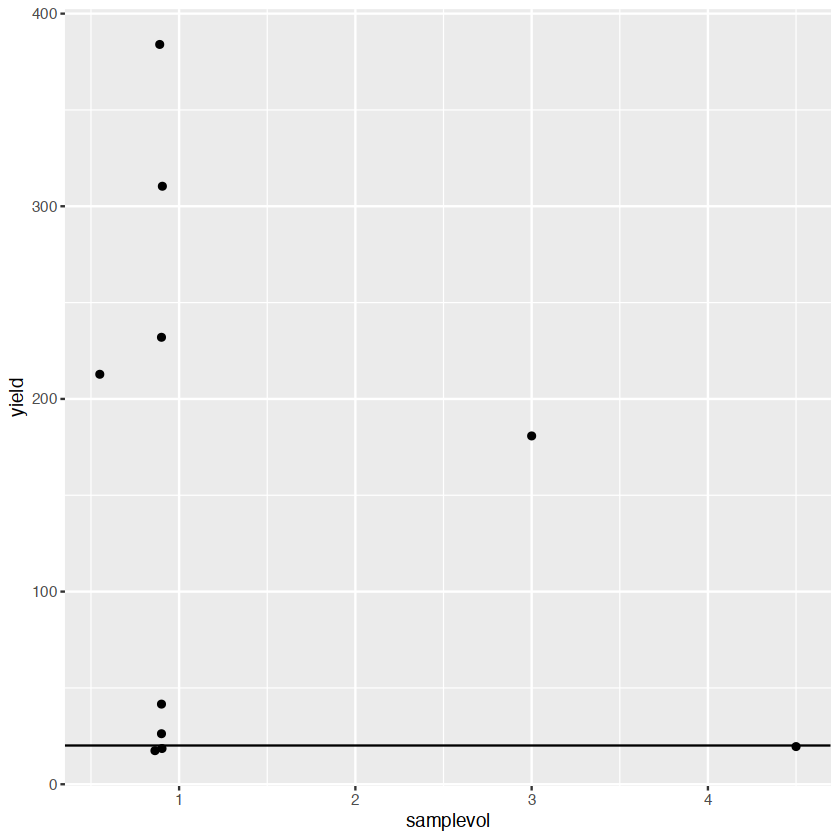

In [45]:
ggplot(data = nbl_cfdna, aes( y= yield, x = samplevol)) + geom_point() + geom_hline(yintercept = 20) 
#coord_cartesian(y = c(0,100)) #+ geom_smooth( method = "lm")

In [46]:
summary(nbl_cfdna$samplevol)
summary(nbl_cfdna$yield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5500  0.8925  0.9000  1.4311  0.9045  4.5000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.44   21.23  111.20  144.34  227.20  384.00 